In [8]:
import pandas as pd

Описание данных

– Title — название дела, рассматриваемого в суде

– Date — дата вынесения решения

– Issue — номер заседания

– Judge1, Judge2, Judge3 — имена судей

– Vote1, Vote2, Vote3 — голос судьи (либеральный = 1, консервативный = 0)

– Category — категория дела




In [9]:
df = pd.read_csv("/content/TenthCircuit.csv")

In [10]:
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     954 non-null    object
 1   Date      954 non-null    object
 2   Issue     954 non-null    int64 
 3   Judge1    954 non-null    object
 4   Judge2    954 non-null    object
 5   Judge3    954 non-null    object
 6   Vote1     954 non-null    int64 
 7   Vote2     954 non-null    int64 
 8   Vote3     954 non-null    int64 
 9   Category  954 non-null    object
dtypes: int64(4), object(6)
memory usage: 74.7+ KB


Какой график лучше всех подойдет для визуализации тренда суммарного количества всех рассмотренных дел за каждый год? Выберите один верный ответ.

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     954 non-null    object        
 1   Date      954 non-null    datetime64[ns]
 2   Issue     954 non-null    int64         
 3   Judge1    954 non-null    object        
 4   Judge2    954 non-null    object        
 5   Judge3    954 non-null    object        
 6   Vote1     954 non-null    int64         
 7   Vote2     954 non-null    int64         
 8   Vote3     954 non-null    int64         
 9   Category  954 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 74.7+ KB


In [16]:
group_df = df.groupby(df["Date"].dt.year)

In [ ]:
group_df[""]

Укажите, верно ли следующее утверждение: для визуализации суммарного количества дел по каждой категории (переменная Category) подойдет столбчатая диаграмма..

Выберите только те наблюдения, где все судьи голосовали одинаково. Постройте столбчатую диаграмму для суммарного количества заседаний по каждой категории и определите, каких заседаний и в какой категории дел больше — тех, где судьи голосовали либерально, или тех, где голоса были консервативны. Выберите один верный ответ.

In [18]:
odin = df[(df["Vote1"] == 1) & (df["Vote2"] == 1) & (df["Vote3"] == 1) | (df["Vote1"] == 0) & (df["Vote2"] == 0) & (df["Vote3"] == 0)]

In [19]:
odin

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,2006-01-31,1,Henry,McKay,Murphy,0,0,0,Immigration
950,Infanzon v. Gonzales,2006-01-24,1,Henry,McKay,Murphy,0,0,0,Immigration
951,Otero v. Gonzales,2006-01-24,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration
952,Infanzon v. Comfort,2006-01-18,1,Briscoe,Lucero,Murphy,0,0,0,Immigration


In [27]:
df["Category"].value_counts()

Immigration    554
Title VII      400
Name: Category, dtype: int64

In [33]:
odin[odin["Category"] == "Immigration"]["Vote1"].value_counts()

0    500
1     47
Name: Vote1, dtype: int64

In [34]:
odin[odin["Category"] == "Title VII"]["Vote1"].value_counts()

0    328
1     59
Name: Vote1, dtype: int64

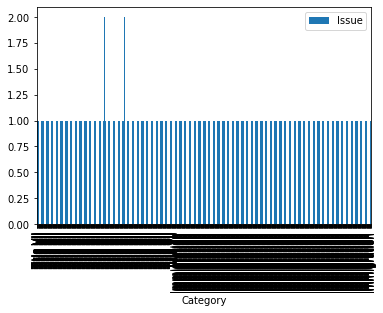

In [20]:
odin.plot.bar(x="Category", y="Issue")

Выберите заседания только за 2016 год. Постройте линейный график и определите, в каких месяцах наблюдались пиковые значения по числу заседаний. Будьте внимательны — даты записаны в формате месяц/день/год. Выберите один верный ответ.

In [35]:
df2016 = df[df["Date"].dt.year == 2016]

In [37]:
df2016["Date"].dt.month.value_counts()

1     11
4      9
8      7
7      6
12     5
9      4
3      4
2      4
6      2
11     1
10     1
5      1
Name: Date, dtype: int64

In [39]:
df2016[(df2016["Date"].dt.month == 1)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
19,Unal v. Los Alamos Public Schools,2016-01-29,1,Briscoe,Lucero,McHugh,1,1,1,Title VII
20,Unal v. Los Alamos Public Schools,2016-01-29,2,Briscoe,Lucero,McHugh,0,0,0,Title VII
21,Hannah v. Cowlishaw,2016-01-29,1,Lucero,Gorsuch,McHugh,0,0,0,Title VII
22,"Montoya v. Hunter Douglas Window Fashions, Inc.",2016-01-25,1,Phillips,McHugh,Moritz,0,0,0,Title VII
23,Mancell v. McHugh,2016-01-25,1,Hartz,Baldock,Holmes,0,0,0,Title VII
24,L'Ggrke v. Asset Plus Corp.,2016-01-20,1,Hartz,Baldock,Holmes,0,0,0,Title VII
25,Lewis v. Twenty-First Century Bean Processing,2016-01-06,1,Gorsuch,McKay,Bacharach,0,0,0,Title VII
425,Zhang v. Lynch,2016-01-29,1,Hartz,Baldock,Holmes,0,0,0,Immigration
426,Guru v. Lynch,2016-01-26,1,Kelly,Lucero,McHugh,0,0,0,Immigration
427,Gutierrez-Orozco v. Lynch,2016-01-21,1,Bacharach,O'Brien,Phillips,0,0,0,Immigration


In [40]:
df2016[(df2016["Date"].dt.month == 4)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
13,Johnson v. Oklahoma Department of Transp.,2016-04-20,1,Gorsuch,McKay,Bacharach,0,0,0,Title VII
14,Walton v. Powell,2016-04-19,1,Gorsuch,Murphy,Moritz,1,1,1,Title VII
15,"Aman v. Dillon Companies, Inc.",2016-04-15,1,Briscoe,Lucero,McHugh,0,0,0,Title VII
16,McGowan v. Board of Trustees of Metropolitan S...,2016-04-13,1,Briscoe,Lucero,McHugh,0,0,0,Title VII
17,"Robinson v. St. John Medical Center, Inc.",2016-04-13,1,Gorsuch,Matheson,Moritz,0,0,0,Title VII
18,"Tuffa v. Flight Services & Systems, Inc.",2016-04-05,1,Gorsuch,McKay,Bacharach,0,0,0,Title VII
414,Garcia v. Lynch,2016-04-28,1,Kelly,Porfilio,Baldock,0,0,0,Immigration
415,Ontiveros v. Lynch,2016-04-27,1,Gorsuch,Matheson,Moritz,0,0,0,Immigration
416,Htun v. Lynch,2016-04-08,1,Hartz,Baldock,McHugh,0,0,0,Immigration


Используя исходные данные, определите среднее число заседаний за каждый сезон (зима, весна, лето, осень). Постройте столбчатую диаграмму, определите месяц с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. Введите ответ в виде слова (например, осень).

In [57]:
df[(df["Date"].dt.month == 1) | (df["Date"].dt.month == 2) |(df["Date"].dt.month == 12)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII
19,Unal v. Los Alamos Public Schools,2016-01-29,1,Briscoe,Lucero,McHugh,1,1,1,Title VII
...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,2006-01-31,1,Henry,McKay,Murphy,0,0,0,Immigration
950,Infanzon v. Gonzales,2006-01-24,1,Henry,McKay,Murphy,0,0,0,Immigration
951,Otero v. Gonzales,2006-01-24,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration
952,Infanzon v. Comfort,2006-01-18,1,Briscoe,Lucero,Murphy,0,0,0,Immigration


In [58]:
df[(df["Date"].dt.month == 3) | (df["Date"].dt.month == 4) |(df["Date"].dt.month == 5)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
12,Glapion v. Castro,2016-05-12,1,Kelly,O'Brien,Gorsuch,0,0,0,Title VII
13,Johnson v. Oklahoma Department of Transp.,2016-04-20,1,Gorsuch,McKay,Bacharach,0,0,0,Title VII
14,Walton v. Powell,2016-04-19,1,Gorsuch,Murphy,Moritz,1,1,1,Title VII
15,"Aman v. Dillon Companies, Inc.",2016-04-15,1,Briscoe,Lucero,McHugh,0,0,0,Title VII
16,McGowan v. Board of Trustees of Metropolitan S...,2016-04-13,1,Briscoe,Lucero,McHugh,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
940,Sondh v. Gonzales,2006-03-28,1,Hartz,Ebel,Tymkovich,0,0,0,Immigration
941,Herrera-Ceja v. Gonzales,2006-03-28,1,Lucero,Ebel,Murphy,0,0,0,Immigration
942,Panjaitan v. Gonzales,2006-03-28,1,Murphy,Seymour,McConnell,0,0,0,Immigration
943,Al-Ani v. Gonzales,2006-03-20,1,Henry,McKay,Murphy,0,0,0,Immigration


In [59]:
df[(df["Date"].dt.month == 6) | (df["Date"].dt.month == 7) |(df["Date"].dt.month == 8)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
6,Chung v. El Paso School District #11,2016-08-11,1,Hartz,Holmes,McHugh,0,0,0,Title VII
7,Bird v. West Valley City,2016-08-08,1,Matheson,Baldock,Moritz,0,0,0,Title VII
8,Drury v. BNSF Railway Company,2016-08-02,1,Tymkovich,Lucero,Bacharach,0,0,0,Title VII
9,"Callahan v. Communication Graphics, Inc.",2016-07-21,1,Gorsuch,Baldock,McHugh,0,0,0,Title VII
10,Williams v. McKee,2016-07-20,1,Tymkovich,Murphy,Bacharach,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
927,Bastian v. Gonzales,2006-07-06,1,McConnell,Anderson,Baldock,0,0,0,Immigration
928,Vargas v. Department Of Homeland Security,2006-06-21,1,Hartz,Ebel,Tymkovich,0,0,0,Immigration
929,Schmitt v. Maurer,2006-06-20,1,Lucero,Baldock,McConnell,0,0,0,Immigration
930,Ballesteros v. Ashcroft,2006-06-14,1,Henry,McKay,Tymkovich,0,0,0,Immigration


In [60]:
df[(df["Date"].dt.month == 9) | (df["Date"].dt.month == 10) | (df["Date"].dt.month == 11)]

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII
5,ElHelbawy v. Pritzker,2016-10-13,1,Tymkovich,Bacharach,Moritz,0,0,0,Title VII
29,Sanders v. Anoatubby,2015-11-23,1,Gorsuch,O'Brien,Bacharach,0,0,0,Title VII
30,McElroy v. American Family Ins.,2015-10-30,1,Briscoe,Holmes,Moritz,0,0,0,Title VII
31,Hung Thai Pham v. James,2015-10-20,1,Tymkovich,Holmes,McHugh,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
909,Umboh v. Gonzales,2006-10-05,1,Hartz,Holloway,Baldock,0,0,0,Immigration
910,Mondal v. Gonzales,2006-10-04,1,Henry,Anderson,McConnell,0,0,0,Immigration
911,Asagwara v. Gonzales,2006-09-18,1,O'Brien,Porfilio,Anderson,0,0,0,Immigration
912,Thorn v. Gonzales,2006-09-13,1,Tacha,O'Brien,McConnell,0,0,0,Immigration


Выберите только заседания по категории иммиграции. Постройте столбчатую диаграмму по суммарному числу заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

In [41]:
cat_df = df[df["Category"] == "Immigration"]

In [43]:
name_df = pd.concat([cat_df["Judge1"], cat_df["Judge2"], cat_df["Judge3"]])

In [44]:
name_df.value_counts()

Tymkovich     122
Hartz         105
Lucero        102
Porfilio      100
Holmes         96
Baldock        96
Anderson       95
O'Brien        91
Kelly          90
Briscoe        84
McKay          80
Brorby         78
Ebel           68
Murphy         61
Matheson       61
Gorsuch        51
Tacha          42
McConnell      37
Bacharach      36
Henry          31
Phillips       30
Holloway       26
McHugh         24
Moritz         23
Seymour        14
Brown           4
Mcwilliams      2
Eagan           2
Arguello        2
Figa            2
Kane            2
Siler           1
Barrett         1
Armijo          1
Frizzell        1
Johnson         1
dtype: int64

Определите, какие дела (переменная Title) рассматривались чаще всего. Постройте столбчатую диаграмму по суммарному числу таких заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

In [50]:
df["Title"].value_counts()[0:5]

Tabor v. Hilti, Inc.                           3
Semsroth v. City of Wichita                    3
Garcia v. Holder                               3
Singh v. Holder                                3
Flitton v. Primary Residential Mortg., Inc.    3
Name: Title, dtype: int64

In [51]:
new_name_df = df[(df["Title"] == "Tabor v. Hilti, Inc.") | (df["Title"] == "Semsroth v. City of Wichita") |(df["Title"] == "Garcia v. Holder") |(df["Title"] == "Singh v. Holder") |(df["Title"] == "Flitton v. Primary Residential Mortg., Inc.")]

In [54]:
new_name_df

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
69,"Tabor v. Hilti, Inc.",2014-09-02,1,Hartz,Tymkovich,Holmes,0,0,0,Title VII
125,"Tabor v. Hilti, Inc.",2013-01-15,1,Lucero,O'Brien,Matheson,1,1,1,Title VII
126,"Tabor v. Hilti, Inc.",2013-01-15,2,Lucero,O'Brien,Matheson,0,0,0,Title VII
218,"Flitton v. Primary Residential Mortg., Inc.",2010-08-05,1,Tacha,McKay,Gorsuch,1,0,1,Title VII
219,"Flitton v. Primary Residential Mortg., Inc.",2010-08-05,2,Tacha,McKay,Gorsuch,0,0,1,Title VII
263,Semsroth v. City of Wichita,2009-02-17,1,Murphy,McKay,Anderson,0,0,0,Title VII
268,Semsroth v. City of Wichita,2008-12-22,1,Lucero,Holloway,Ebel,1,1,1,Title VII
269,Semsroth v. City of Wichita,2008-12-22,2,Lucero,Holloway,Ebel,0,0,0,Title VII
323,"Flitton v. Primary Residential Mortg., Inc.",2007-08-03,1,Lucero,Murphy,Gorsuch,1,1,1,Title VII
472,Garcia v. Holder,2015-03-24,1,Moritz,Porfilio,Baldock,0,0,0,Immigration


In [55]:
pd.concat([new_name_df["Judge1"], new_name_df["Judge2"], new_name_df["Judge3"]]).value_counts()

Lucero       6
Murphy       5
Baldock      4
Hartz        3
Tacha        3
Matheson     3
McKay        3
Porfilio     3
Gorsuch      3
Tymkovich    2
O'Brien      2
Holloway     2
Anderson     2
Ebel         2
Moritz       1
Holmes       1
dtype: int64

Обратите внимание на то, как в каждом деле голосовали судьи. Постройте столбчатую диаграмму и определите, каких решений, принятых большинством (2 и более) голосов, больше. Укажите, верно ли следующее утверждение: решений, где большинство судей голосовало консервативно, больше.

In [61]:
cons_df = df[(df["Vote1"] == 0) & (df["Vote2"] == 0) & (df["Vote3"] == 0) | (df["Vote1"] == 0) & (df["Vote2"] == 0) & (df["Vote3"] == 1) | (df["Vote1"] == 0) & (df["Vote2"] == 1) & (df["Vote3"] == 0) | (df["Vote1"] == 1) & (df["Vote2"] == 0) & (df["Vote3"] == 0) ]

In [62]:
cons_df.shape

(840, 10)

In [63]:
df.shape

(954, 10)

Выберите только те заседания, в которых участвовал судья Lucero. Постройте линейный график и определите, в каком году он участвовал в заседаниях меньше всего. Будьте внимательны — даты записаны в формате месяц/день/год. В ответ запишите целое число (например, 2016).

In [66]:
df[(df["Judge1"] == "Lucero") | (df["Judge2"] == "Lucero") | (df["Judge3"] == "Lucero")]["Date"].dt.year.value_counts()

2007    22
2014    21
2008    20
2006    20
2012    17
2015    15
2016    14
2013    14
2011    13
2010    12
2009     9
Name: Date, dtype: int64